# Clustering

Hasta ahora hemos trabajado con métodos supervisados: métodos en los cuales tenemos una etiqueta que aprender en base a unos atributos. En esta sesión trabajaremos con algoritmos no supervisados. Específicamente, estudiaremos diferentes algoritmos de clustering: algoritmos orientados a agrupar datos segun su similitud, sin una etiqueta que los identifique. El objetivo genérico de los algoritmos de clustering es el de reducir las diferencias entre los datos de un cluster, mientras se aumenta la distancia entre los diferentes clusteres.

In [1]:
pip install pandas matplotlib seaborn scikit-learn scipy kmedoids

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.6/921.6 kB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Para apreciar las diferencias entre los distintos algoritmos trabajaremos con 6 datasets sinteticos con diferentes formas:

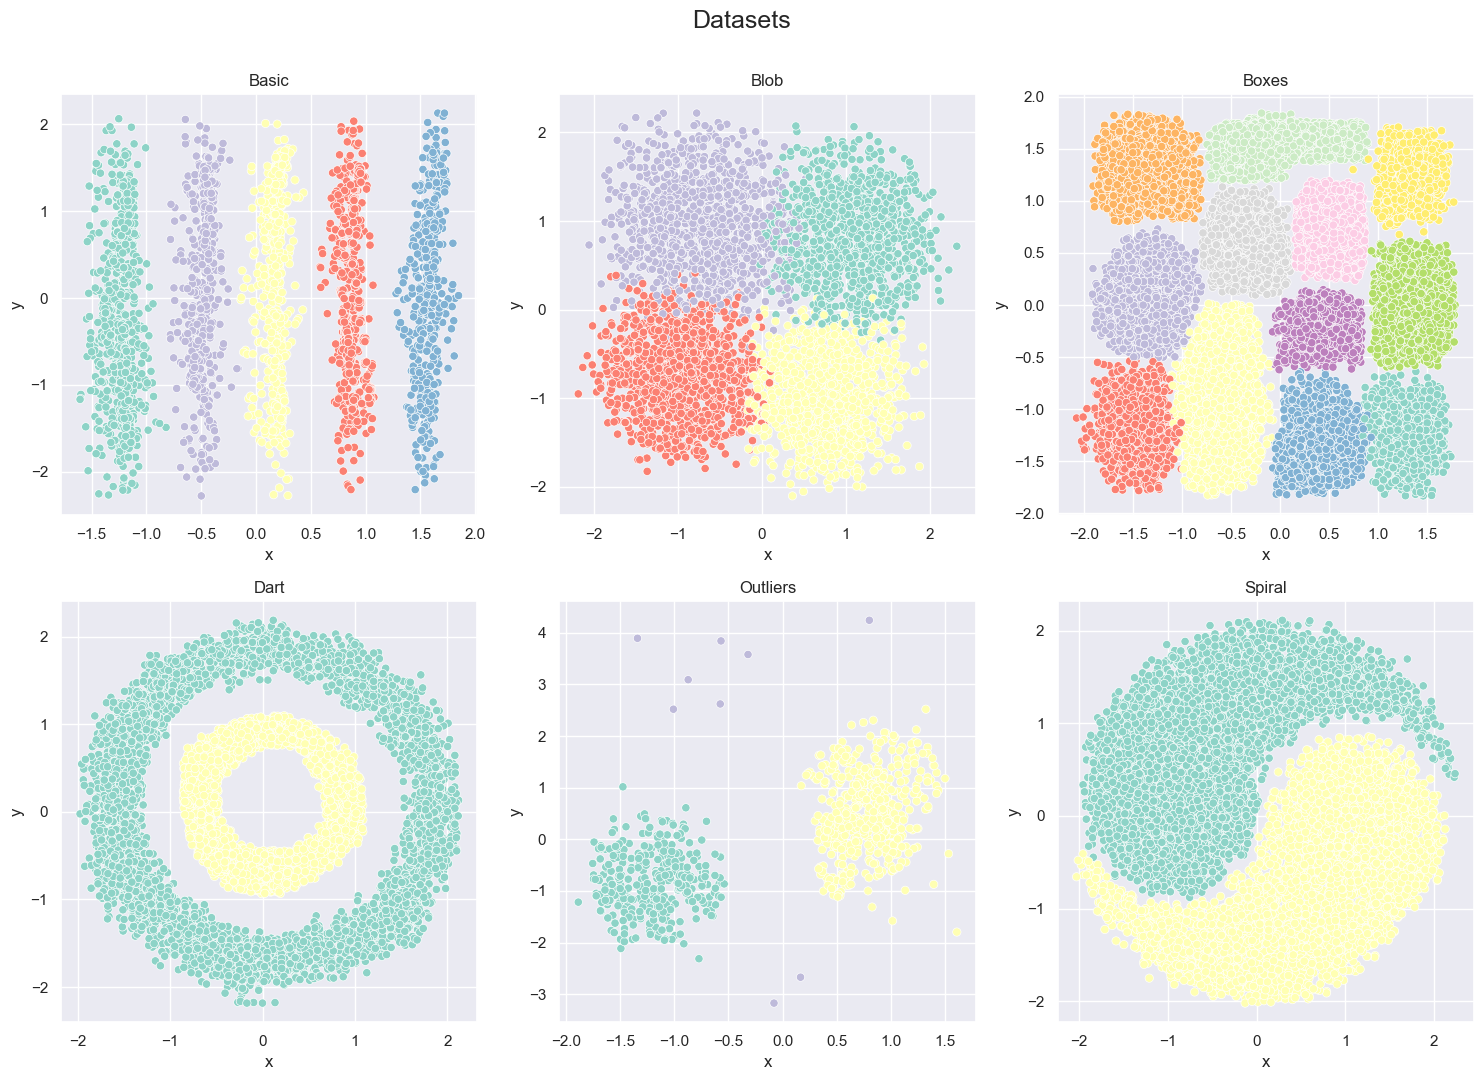

In [159]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

sns.set_theme()
sns.set_palette("Set3")

preprocessor = ColumnTransformer([("scaler", StandardScaler(), ["x", "y"])], remainder='passthrough', verbose_feature_names_out=False)

data1 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data1.csv")), columns=preprocessor.get_feature_names_out())
data2 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data2.csv")), columns=preprocessor.get_feature_names_out())
data3 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data3.csv")), columns=preprocessor.get_feature_names_out())
data4 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data4.csv")), columns=preprocessor.get_feature_names_out())
data5 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data5.csv")), columns=preprocessor.get_feature_names_out())
data6 = pd.DataFrame(preprocessor.fit_transform(pd.read_csv("data/data6.csv")), columns=preprocessor.get_feature_names_out())

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,11))
fig.suptitle('Datasets\n', size = 18)

sns.scatterplot(data1, x="x", y="y", hue='color', palette='Set3', ax = axes[0,0], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='color', palette='Set3', ax = axes[0,1], legend = False)
sns.scatterplot(data3, x="x", y="y", hue='color', palette='Set3', ax = axes[0,2], legend = False)
sns.scatterplot(data4, x="x", y="y", hue='color', palette='Set3', ax = axes[1,0], legend = False)
sns.scatterplot(data5, x="x", y="y", hue='color', palette='Set3', ax = axes[1,1], legend = False)
sns.scatterplot(data6, x="x", y="y", hue='color', palette='Set3', ax = axes[1,2], legend = False)

axes[0,0].set_title("Basic");
axes[0,1].set_title("Blob");
axes[0,2].set_title("Boxes");
axes[1,0].set_title("Dart");
axes[1,1].set_title("Outliers");
axes[1,2].set_title("Spiral");

plt.tight_layout()

## Distancias

Un factor determinante a la hora de definir un algoritmo de clustering es la elección de la distancia usada para comparar observaciones. Algunos de los algoritmos de clustering nos permiten especificar una metrica de distancia, mientras que otros usan una metrica por defecto que no podemos modificar. Podemos consultar todas las distancias implementadas en `scikit-learn` [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) y [aqui](https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics.pairwise). Además, `scipy` tambien implementa algunas distancias [aqui](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance).

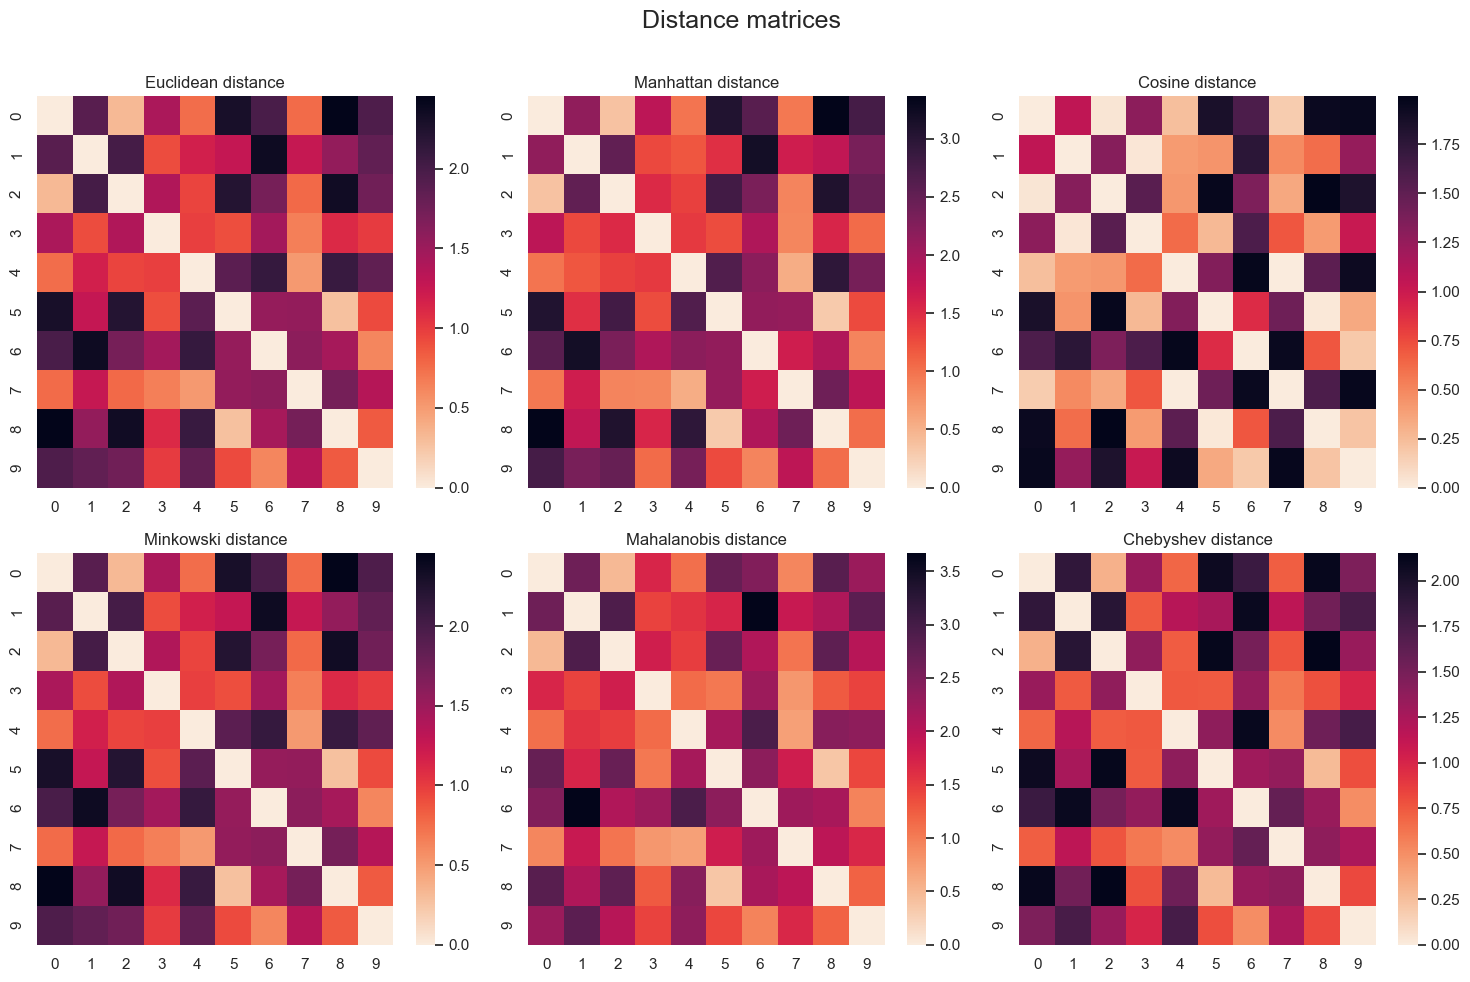

In [160]:
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances
from scipy.spatial.distance import pdist, squareform

# calculamos las distancias solo para los 10 primeros puntos de data1 para que sea más rápido de calcular y más facil de visualizar
sample = data1.iloc[0:10][["x", "y"]]

euclidean_distances_matrix = euclidean_distances(sample)
manhattan_distances_matrix = manhattan_distances(sample)
cosine_distances_matrix = cosine_distances(sample)
minkowski_distances_matrix = squareform(pdist(sample, metric="minkowski"))
mahalanobis_distances_matrix = squareform(pdist(sample, metric="mahalanobis"))
chebyshev_distances_matrix = squareform(pdist(sample, metric="chebyshev"))

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
fig.suptitle('Distance matrices\n', size = 18)

sns.heatmap(euclidean_distances_matrix, ax=axes[0][0], cmap="rocket_r")
sns.heatmap(manhattan_distances_matrix, ax=axes[0][1], cmap="rocket_r")
sns.heatmap(cosine_distances_matrix, ax=axes[0][2], cmap="rocket_r")
sns.heatmap(minkowski_distances_matrix, ax=axes[1][0], cmap="rocket_r")
sns.heatmap(mahalanobis_distances_matrix, ax=axes[1][1], cmap="rocket_r")
sns.heatmap(chebyshev_distances_matrix, ax=axes[1][2], cmap="rocket_r")

axes[0][0].set_title("Euclidean distance");
axes[0][1].set_title("Manhattan distance");
axes[0][2].set_title("Cosine distance");
axes[1][0].set_title("Minkowski distance");
axes[1][1].set_title("Mahalanobis distance");
axes[1][2].set_title("Chebyshev distance");

plt.tight_layout()

plt.show()

<div class="alert alert-info">

**Ejercicio:**

Cual es la distancia euclidea entre las observaciones 55 y 123 del dataset estandarizado `data3`?
</div>

## Clustering basado en particionado

Los algoritmos de clustering basados en particiones dividen los datos en un número predefinido de grupos, asignando cada punto a un único clúster. Dos de los algoritmos de particionado más utilizados son el k-Means y el k-Medoids. 

### k-Means

Uno de los métodos más habituales para realizar un agrupamiento por particionado es el k-means. Este método requiere que se determine a priori el número de clusteres deseado, asigna un centroide a cada cluster y finalmente asigna los puntos observados al centroide más cercano. 

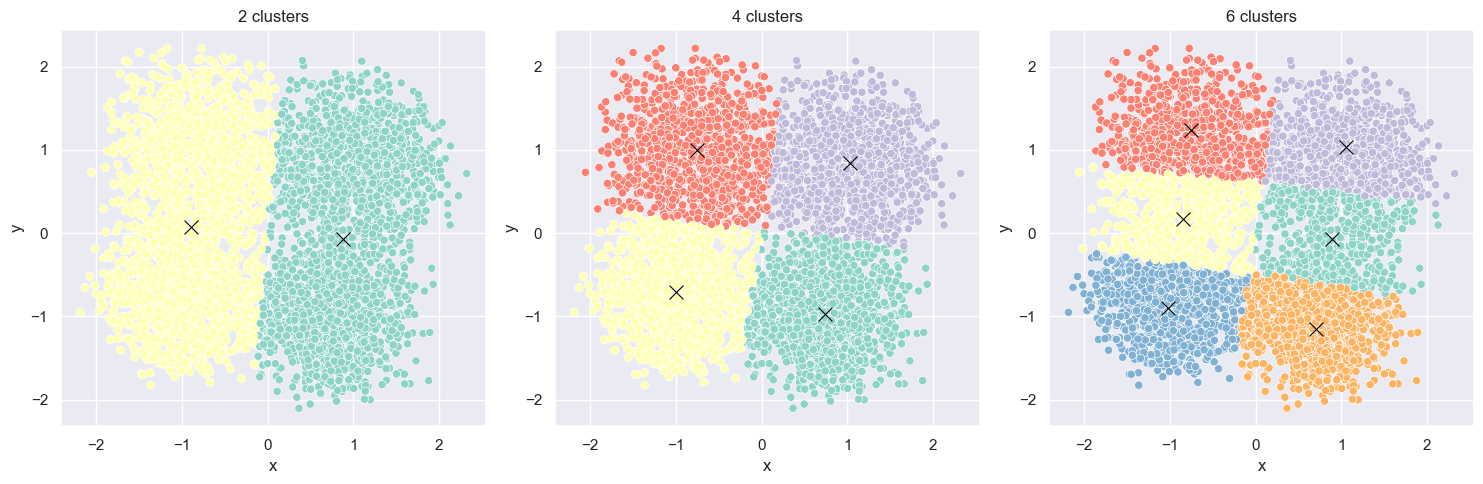

In [186]:
from sklearn.cluster import KMeans

k_2_means = KMeans(n_clusters=2, random_state=42).fit(data2[['x', 'y']])
k_4_means = KMeans(n_clusters=4, random_state=42).fit(data2[['x', 'y']])
k_6_means = KMeans(n_clusters=6, random_state=42).fit(data2[['x', 'y']])

data2['2-means'] = k_2_means.labels_
data2['4-means'] = k_4_means.labels_
data2['6-means'] = k_6_means.labels_

fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15,5))

sns.scatterplot(data2, x="x", y="y", hue='2-means', palette='Set3', ax = axes[0], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='4-means', palette='Set3', ax = axes[1], legend = False)
sns.scatterplot(data2, x="x", y="y", hue='6-means', palette='Set3', ax = axes[2], legend = False)

sns.scatterplot(x=k_2_means.cluster_centers_[:,0], y=k_2_means.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes[0])
sns.scatterplot(x=k_4_means.cluster_centers_[:,0], y=k_4_means.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes[1])
sns.scatterplot(x=k_6_means.cluster_centers_[:,0], y=k_6_means.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes[2])

axes[0].set_title("2 clusters");
axes[1].set_title("4 clusters");
axes[2].set_title("6 clusters");

plt.tight_layout()

La forma de los datos influye mucho en la calidad del agrupamiento. Así, si tenemos unos datos no convexos, como los del dataset `data4`, veremos que el resultado del agrupamiento es mediocre:

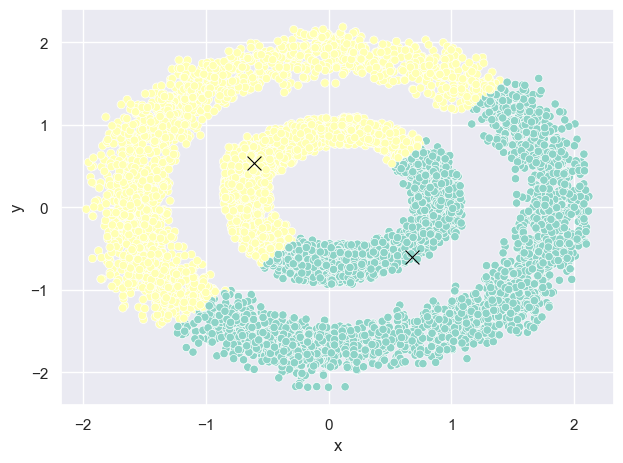

In [192]:
k_2_means_data_4 = KMeans(n_clusters=2, random_state=42).fit(data4[['x', 'y']])

data4['2-means'] = k_2_means_data_4.labels_

axes = plt.axes()

sns.scatterplot(data4, x="x", y="y", hue='2-means', palette='Set3', legend = False, ax = axes)
sns.scatterplot(x=k_2_means_data_4.cluster_centers_[:,0], y=k_2_means_data_4.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes)

plt.tight_layout()

<div class="alert alert-info">

**Ejercicio:**

Aplica un k-means al resto de datasets. Puedes escoger el número de clusters optimo visualmente mirando las gráficas de los datasets. En que casos el k-means funciona mejor? En cuales lo hace peor?
</div>

### k-Medoids

Uno de los problemas del algoritmo k-Means es que los centroides que genera pueden ser "sintéticos". Es decir, no tienen por que estar presentes en las observaciones del dataset, si no que pueden ser un punto cualquiera del espacio. El algoritmo k-Medoids soluciona este problema reemplazando los centroides por medoides: puntos de entre los observados que representan el centro del cluster.

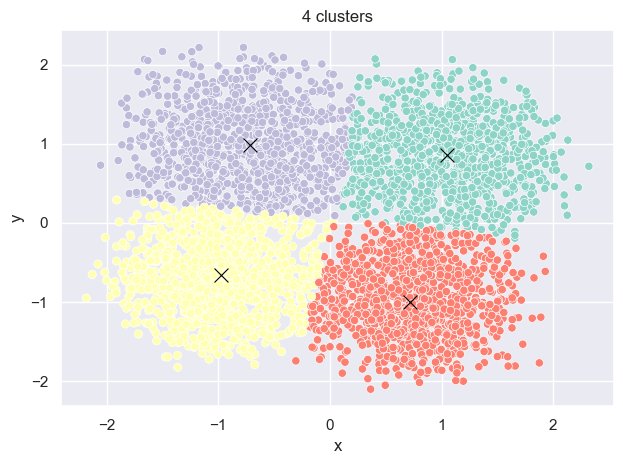

In [193]:
import kmedoids

k_4_medoids = kmedoids.KMedoids(n_clusters=4, random_state=42, metric="euclidean")
k_4_medoids.fit(data2[['x', 'y']].to_numpy())

data2['4-medoids'] = k_4_medoids.labels_

axes = plt.axes()

sns.scatterplot(data2, x="x", y="y", hue='4-medoids', palette='Set3', ax = axes, legend = False)
sns.scatterplot(x=k_4_medoids.cluster_centers_[:,0], y=k_4_medoids.cluster_centers_[:,1], color='black', marker='x', s=100, ax = axes)

axes.set_title("4 clusters")

plt.tight_layout()



In [207]:
print("k-Means:")

for centroid in k_4_means.cluster_centers_:
    print(f"\tCentroid {centroid} in data? {centroid in data2[['x', 'y']].to_numpy()}")

print("k-Medoids:")

for medoid in k_4_medoids.cluster_centers_:
    print(f"\tMedoid {medoid} in data? {medoid in data2[['x', 'y']].to_numpy()} (Observation {np.where(data2[['x', 'y']].to_numpy() == medoid)[0][0]})")

k-Means:
	Centroid [ 0.73759078 -0.97187437] in data? False
	Centroid [-0.9974559  -0.70892019] in data? False
	Centroid [1.02712147 0.84696877] in data? False
	Centroid [-0.75911506  0.99516257] in data? False
k-Medoids:
	Medoid [1.04591463 0.85673284] in data? True (Observation 3036)
	Medoid [-0.97943025 -0.65898913] in data? True (Observation 92)
	Medoid [-0.7120295   0.98192678] in data? True (Observation 3026)
	Medoid [ 0.71529591 -1.00160848] in data? True (Observation 2490)


<div class="alert alert-info">

**Ejercicio:**

Aplica un k-medoids al resto de datasets. Puedes escoger el número de clusters optimo visualmente mirando las gráficas de los datasets. Observas alguna diferencia de funcionamiento entre este y el k-means?
</div>

## Clustering basado en densidad

## Clustering jerárquico

## Selección del número óptimo de clusters: Método de Silhouette

Como hemos podido ver, los resultados de algunos algoritmos de agrupamiento son muy dependientes del numero de clusters seleccionado. Para guiarnos en la selección del numero de clusters óptimo podemos emplear el método de Silhouette:

For 2 clusters the average Silhouette score is 0.3796


([<matplotlib.axis.XTick at 0x2c0818ed310>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

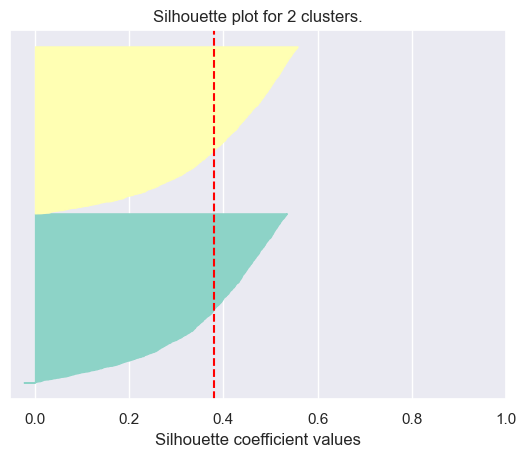

In [187]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

silhouette_avg = silhouette_score(data2[['x', 'y']], data2['2-means'])
silhouette_values = silhouette_samples(data2[['x', 'y']], data2['2-means'])

print(f'For 2 clusters the average Silhouette score is {silhouette_avg:.4f}')

y_lower = 0

for cluster in data2['2-means'].unique():
    cluster_silhouette_values = silhouette_values[data2['2-means'] == cluster]
    cluster_silhouette_values.sort()

    plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_values)), cluster_silhouette_values, color=f"C{cluster}")
    y_lower = y_lower + len(cluster_silhouette_values)

plt.title("Silhouette plot for 2 clusters.")
plt.xlabel("Silhouette coefficient values")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])


For 4 clusters the average Silhouette score is 0.4720


([<matplotlib.axis.XTick at 0x2c0818e1450>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

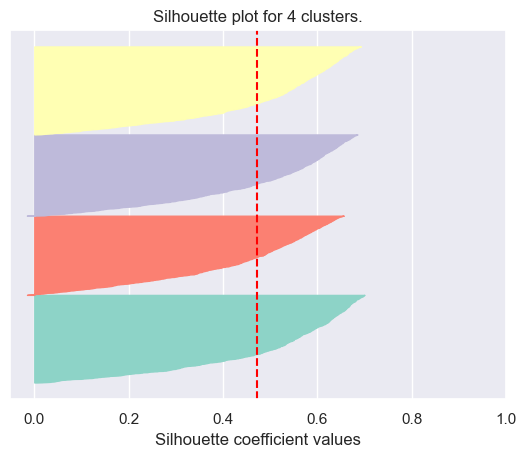

In [188]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(data2[['x', 'y']], data2['4-means'])
silhouette_values = silhouette_samples(data2[['x', 'y']], data2['4-means'])

print(f'For 4 clusters the average Silhouette score is {silhouette_avg:.4f}')

y_lower = 0

for cluster in data2['4-means'].unique():
    cluster_silhouette_values = silhouette_values[data2['4-means'] == cluster]
    cluster_silhouette_values.sort()

    plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_values)), cluster_silhouette_values, color=f"C{cluster}")
    y_lower = y_lower + len(cluster_silhouette_values)

plt.title("Silhouette plot for 4 clusters.")
plt.xlabel("Silhouette coefficient values")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])



For 6 clusters the average Silhouette score is 0.3588


([<matplotlib.axis.XTick at 0x2c082095e50>,
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

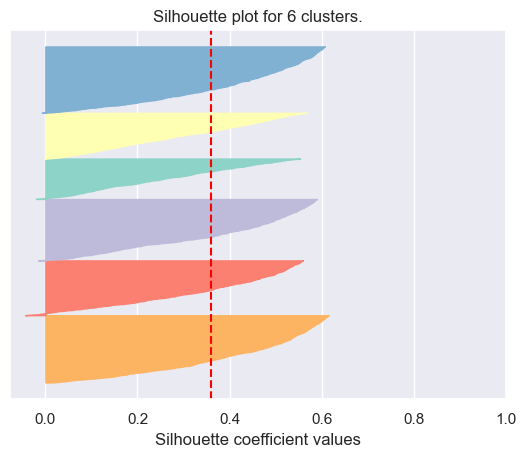

In [189]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(data2[['x', 'y']], data2['6-means'])
silhouette_values = silhouette_samples(data2[['x', 'y']], data2['6-means'])

print(f'For 6 clusters the average Silhouette score is {silhouette_avg:.4f}')

y_lower = 0

for cluster in data2['6-means'].unique():
    cluster_silhouette_values = silhouette_values[data2['6-means'] == cluster]
    cluster_silhouette_values.sort()

    plt.fill_betweenx(np.arange(y_lower, y_lower + len(cluster_silhouette_values)), cluster_silhouette_values, color=f"C{cluster}")
    y_lower = y_lower + len(cluster_silhouette_values)

plt.title("Silhouette plot for 6 clusters.")
plt.xlabel("Silhouette coefficient values")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
